In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download("stopwords")
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words("english"))

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\osama\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
data = pd.read_csv("dataset.csv")
print(f"Data shape : {data.shape}")

Data shape : (50000, 3)


In [4]:
data.head()

,Index,review,sentiment
0,0,One of the other reviewers has mentioned that ...,1
1,1,A wonderful little production. <br /><br />The...,1
2,2,I thought this was a wonderful way to spend ti...,1
3,3,Basically there's a family where a little boy ...,0
4,4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [5]:
#Cloumn names
print(f"Coloumn names : {data.columns.values}")

Coloumn names : ['Index' 'review' 'sentiment']


In [6]:
data.isnull().sum()

Index        0
review       0
sentiment    0
dtype: int64

In [7]:
data["Length"]=data["review"].apply(len)

In [24]:
data.head()

,Index,review,sentiment,Length
0,0,One of the other reviewers has mentioned that ...,1,1761
1,1,A wonderful little production. <br /><br />The...,1,998
2,2,I thought this was a wonderful way to spend ti...,1,926
3,3,Basically there's a family where a little boy ...,0,748
4,4,"Petter Mattei's ""Love in the Time of Money"" is...",1,1317


In [25]:
data.dtypes

Index         int64
review       object
sentiment     int64
Length        int64
dtype: object

In [26]:
print("Sentiment value count:")
print(f"{data['sentiment'].value_counts()}")

Sentiment value count:
sentiment
1    25000
0    25000
Name: count, dtype: int64


In [27]:
senti_0 = data[data["sentiment"]==0].iloc[1]["review"]
print(senti_0)

This show was an amazing, fresh & innovative idea in the 70's when it first aired. The first 7 or 8 years were brilliant, but things dropped off after that. By 1990, the show was not really funny anymore, and it's continued its decline further to the complete waste of time it is today.<br /><br />It's truly disgraceful how far this show has fallen. The writing is painfully bad, the performances are almost as bad - if not for the mildly entertaining respite of the guest-hosts, this show probably wouldn't still be on the air. I find it so hard to believe that the same creator that hand-selected the original cast also chose the band of hacks that followed. How can one recognize such brilliance and then see fit to replace it with such mediocrity? I felt I must give 2 stars out of respect for the original cast that made this show such a huge success. As it is now, the show is just awful. I can't believe it's still on the air.


In [28]:
senti_1 = data[data["sentiment"]==1].iloc[1]["review"]
print(senti_1)

A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.


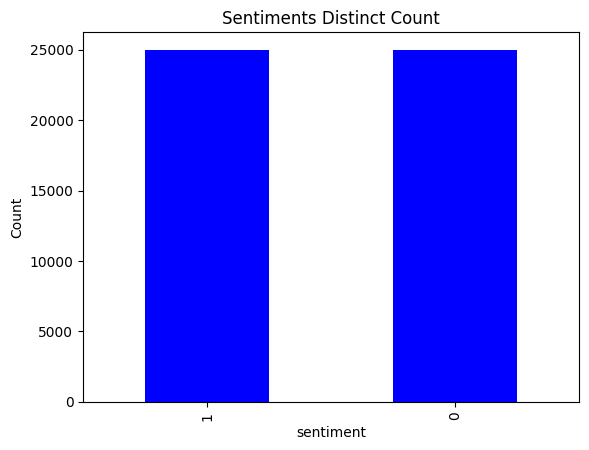

In [29]:
data["sentiment"].value_counts().plot.bar(color="blue")
plt.title("Sentiments Distinct Count")
plt.xlabel("sentiment")
plt.ylabel("Count")
plt.show()

In [30]:
print("Sentiment Value Count  -  Percentage Distribute:")
print(f"{round(data["sentiment"].value_counts() / data.shape[0]*100,2)}")

Sentiment Value Count  -  Percentage Distribute:
sentiment
1    50.0
0    50.0
Name: count, dtype: float64


In [31]:
print("Sentiment Value Count  -  Percentage Distribution:")
print(f"{round(data['sentiment'].value_counts() / data.shape[0]*100 , 2)}")

Sentiment Value Count  -  Percentage Distribution:
sentiment
1    50.0
0    50.0
Name: count, dtype: float64


<Axes: ylabel='Percentage wise distrubution of sentiments'>

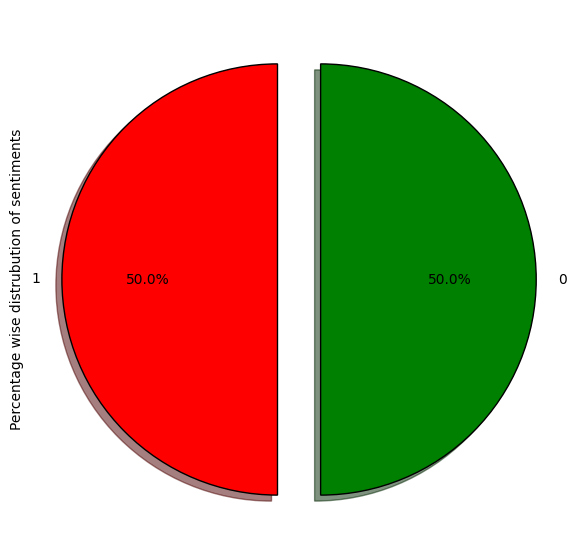

In [32]:
fig = plt.figure(figsize=(7,7))
colors = ("red","green")
wp = {"linewidth":1,"edgecolor":"black"}
tags = data["sentiment"].value_counts() / data.shape[0]
explode = (0.1,0.1)
tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of sentiments')

In [8]:
data["Length"].describe()

count    50000.000000
mean      1309.431020
std        989.728014
min         32.000000
25%        699.000000
50%        970.000000
75%       1590.250000
max      13704.000000
Name: Length, dtype: float64

[Text(0.5, 1.0, 'Distribution of length of reviews')]

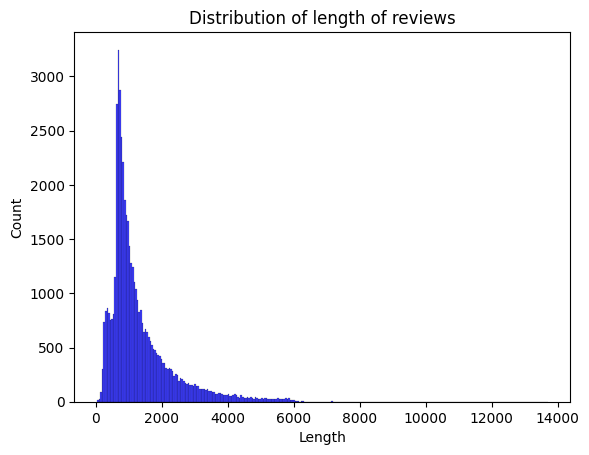

In [9]:
sns.histplot(data["Length"],color="blue").set(title="Distribution of length of reviews")

[Text(0.5, 1.0, 'Distribution of length of reviews if Sentiment is 0')]

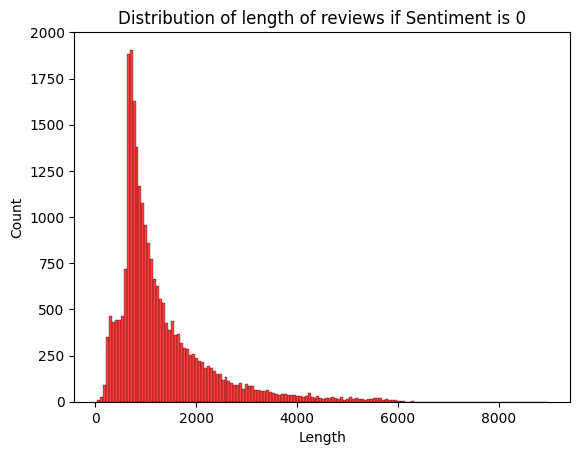

In [10]:
sns.histplot(data[data["sentiment"]==0]["Length"],color="red").set(title="Distribution of length of reviews if Sentiment is 0")

[Text(0.5, 1.0, 'Distribution of length of reviews if Sentiment is 1')]

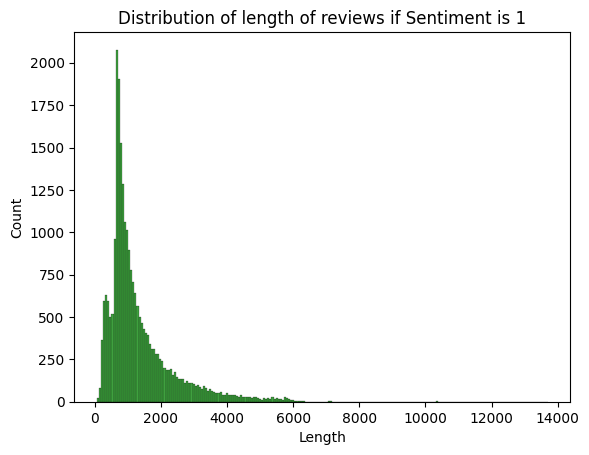

In [11]:
sns.histplot(data[data["sentiment"]==1]["Length"],color="green").set(title="Distribution of length of reviews if Sentiment is 1")